In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

In [2]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：4，动作空间维度：2
开始训练！
回合：20/600，奖励：18.00，评估奖励：18.20，最佳评估奖励：18.20，更新模型！ 0.35
回合：40/600，奖励：19.00，评估奖励：18.80，最佳评估奖励：18.80，更新模型！ 0.17
回合：60/600，奖励：22.00，评估奖励：18.20，最佳评估奖励：18.80，0.10


KeyboardInterrupt: 

In [1]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


NameError: name 'best_agent' is not defined

tensor([[[[0.0037, 0.0037, 0.0956, 0.0042, 0.0042, 0.0039, 0.0058, 0.0039]]]],
       grad_fn=<ToCopyBackward0>)

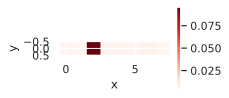

In [6]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [5]:
# torch.save(best_agent, './Data/CartPole-v0-StateAttention-None/Ex1.pt')

/home/wyq/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
